In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'talib'

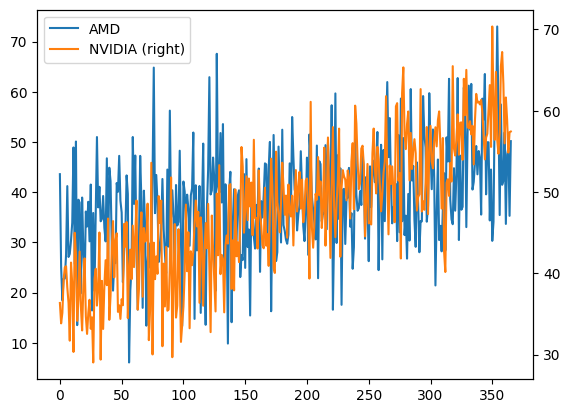

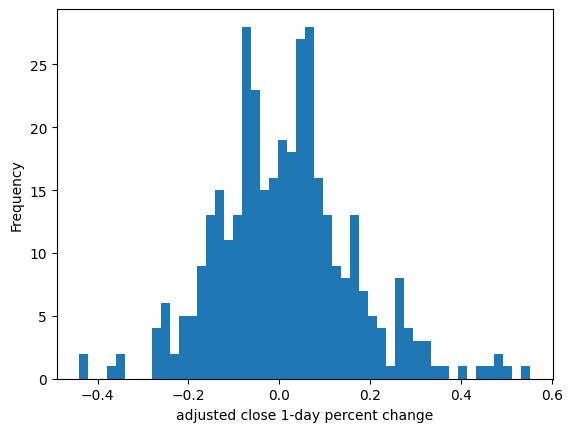

            Adj_Close  Adj_Volume
Date                             
2022-12-31     43.589     3785725
2023-01-01     25.056     3873633
2023-01-02     18.460     3741134
2023-01-03     22.735     3517887
2023-01-04     22.805     3722117
            Adj_Close  Adj_Volume
Date                             
2022-12-31     36.347     4239017
2023-01-01     33.839     3508883
2023-01-02     35.128     4694896
2023-01-03     39.210     4677650
2023-01-04     40.746     3108048


In [2]:
# Load the first Excel file
file1_path = "AMD.xlsx"  # Replace with the actual path
AMD_df = pd.read_excel(file1_path)

# Load the second Excel file
file2_path = "NVIDIA.xlsx"  # Replace with the actual path
NVIDIA_df = pd.read_excel(file2_path)

# Plot the Adj_Close columns for AMD and NVIDIA
AMD_df['Adj_Close'].plot(label='AMD', legend=True)
NVIDIA_df['Adj_Close'].plot(label='NVIDIA', legend=True, secondary_y=True)
plt.show()  # show the plot
plt.clf()  # clear the plot space

# Histogram of the daily price change percent of Adj_Close for NVIDIA
NVIDIA_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

# Convert the 'Date' column to datetime format (optional but recommended)
AMD_df['Date'] = pd.to_datetime(AMD_df['Date'])
NVIDIA_df['Date'] = pd.to_datetime(NVIDIA_df['Date'])

# Set the 'Date' column as the index
AMD_df.set_index('Date', inplace=True)
NVIDIA_df.set_index('Date', inplace=True)

print(AMD_df.head())  # examine the DataFrames
print(NVIDIA_df.head())  # examine the AMD DataFrame

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.497686
5d_close_future_pct     -0.497686             1.000000


C:\Users\Yuchen xin\AppData\Local\Temp\ipykernel_5068\2360676738.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  NVIDIA_df['5d_close_future_pct'] = NVIDIA_df['5d_future_close'].pct_change(5)


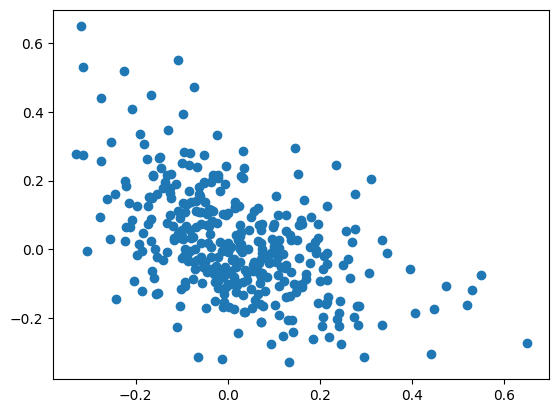

In [3]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
NVIDIA_df['5d_future_close'] = NVIDIA_df['Adj_Close'].shift(-5)
NVIDIA_df['5d_close_future_pct'] = NVIDIA_df['5d_future_close'].pct_change(5)
NVIDIA_df['5d_close_pct'] = NVIDIA_df['Adj_Close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = NVIDIA_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(NVIDIA_df['5d_close_pct'], NVIDIA_df['5d_close_future_pct'])
plt.show()

In [4]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    NVIDIA_df['ma' + str(n)] = talib.SMA(NVIDIA_df['Adj_Close'].values,
                              timeperiod=n) / NVIDIA_df['Adj_Close']
    # Create the RSI indicator
    NVIDIA_df['rsi' + str(n)] = talib.RSI(NVIDIA_df['Adj_Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


In [5]:
# Drop all na values
NVIDIA_df = NVIDIA_df.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = NVIDIA_df[feature_names]
targets = NVIDIA_df['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = NVIDIA_df[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000     -0.465725  0.641564 -0.661228   
5d_close_pct                   -0.465725      1.000000 -0.703163  0.683704   
ma14                            0.641564     -0.703163  1.000000 -0.961661   
rsi14                          -0.661228      0.683704 -0.961661  1.000000   
ma30                            0.667832     -0.682492  0.977797 -0.969944   
rsi30                          -0.674913      0.666402 -0.954672  0.991175   
ma50                            0.681532     -0.662526  0.967003 -0.963575   
rsi50                          -0.679130      0.657004 -0.947948  0.982999   
ma200                           0.693357     -0.657659  0.959428 -0.952161   
rsi200                         -0.684289      0.645883 -0.938638  0.970600   

                         ma30     rsi30      ma50     rsi50     ma200  \
5d_close_future_pct  0.667832 -0.674913  0.681532 -0.679130  0.69335

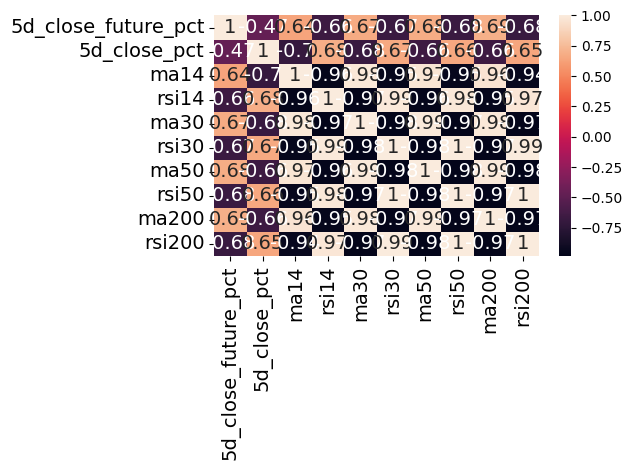

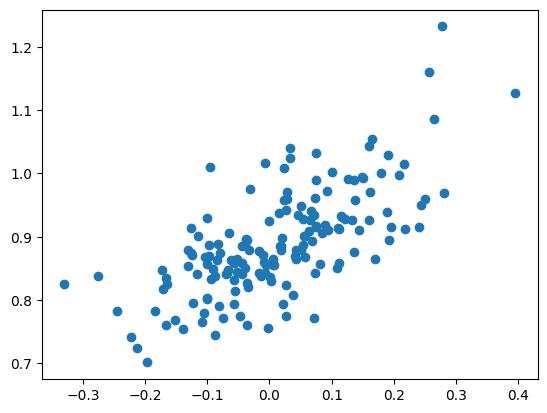

In [6]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(NVIDIA_df['5d_close_future_pct'], NVIDIA_df['ma200'])
plt.show()

In [7]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * linear_features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(161, 10) (136, 10) (25, 10)


In [8]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.525
Model:                             OLS   Adj. R-squared:                  0.491
Method:                  Least Squares   F-statistic:                     15.47
Date:                 Fri, 10 Jan 2025   Prob (F-statistic):           9.20e-17
Time:                         16:13:37   Log-Likelihood:                 140.56
No. Observations:                  136   AIC:                            -261.1
Df Residuals:                      126   BIC:                            -232.0
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          158.7433     56.116    

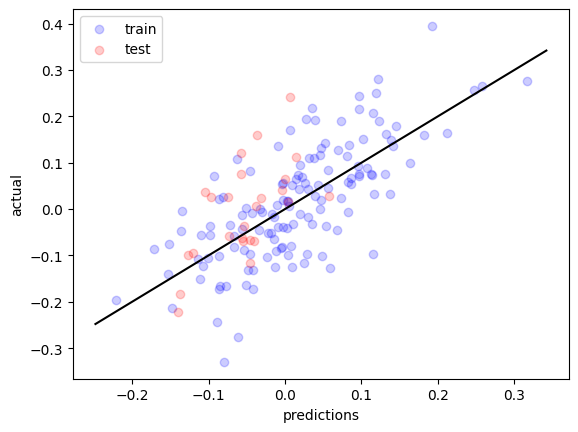

In [9]:
# Scatter the predictions vs the targets with 20% opacity
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

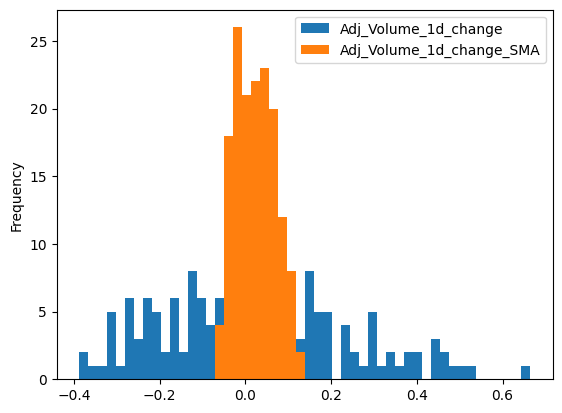

In [10]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
NVIDIA_df['Adj_Volume_1d_change'] = NVIDIA_df['Adj_Volume'].pct_change()
NVIDIA_df['Adj_Volume_1d_change_SMA'] = talib.SMA(NVIDIA_df['Adj_Volume_1d_change'].values,
                        timeperiod=5)

# Plot histogram of volume % change data
NVIDIA_df[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [11]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(NVIDIA_df.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original dataframe index for merging
days_of_week.index = NVIDIA_df.index

# Join the dataframe with the days of week dataframe
NVIDIA_df = pd.concat([NVIDIA_df, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
NVIDIA_df.dropna(inplace=True)  # drop missing values in-place
print(NVIDIA_df.head())

            Adj_Close  Adj_Volume  5d_future_close  5d_close_future_pct  \
Date                                                                      
2023-07-24     43.150     3548917           49.596             0.149386   
2023-07-25     46.016     3214829           51.301             0.114851   
2023-07-26     49.778     3710378           45.572            -0.084495   
2023-07-27     49.055     4201066           48.233            -0.016757   
2023-07-28     54.297     4547042           55.459             0.021401   

            5d_close_pct      ma14      rsi14      ma30      rsi30      ma50  \
Date                                                                           
2023-07-24     -0.164828  1.132834  46.545913  1.127456  48.593407  1.111171   
2023-07-25     -0.036435  1.059813  48.493817  1.055268  49.515271  1.042543   
2023-07-26      0.265039  0.978682  51.017058  0.977268  50.715393  0.961081   
2023-07-27     -0.197070  0.988121  50.504978  0.994398  50.476832  0.9761

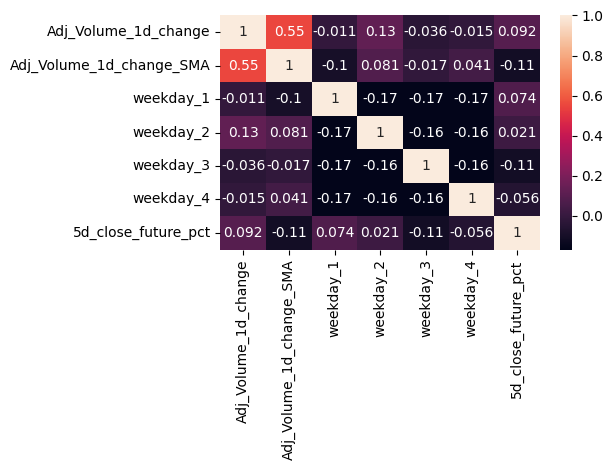

In [12]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])

# Plot the correlations between the new features and the targets
sns.heatmap(NVIDIA_df[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

1.0
-0.8169877556679292


In [14]:
# Loop through a few different max depths and check the performance
for d in [3, 5, 10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.5950809503601843
-0.20639456381812393 

max_depth= 5
0.8057788088389457
-0.47580788737965163 

max_depth= 10
0.998458080602842
-0.8450443695326226 



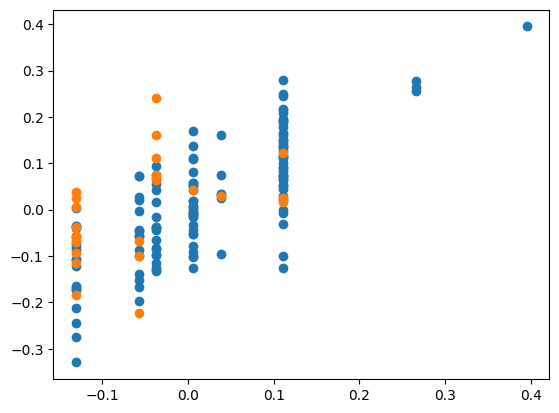

In [15]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9148433266972792
0.27351984377129224


In [17]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.3660451615439282 {'random_state': 42, 'n_estimators': 200, 'max_features': 8, 'max_depth': 3}


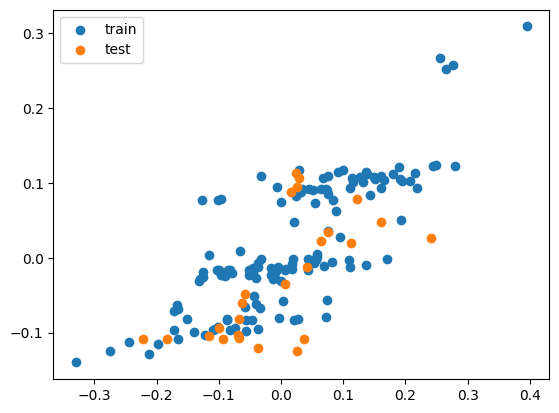

In [18]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

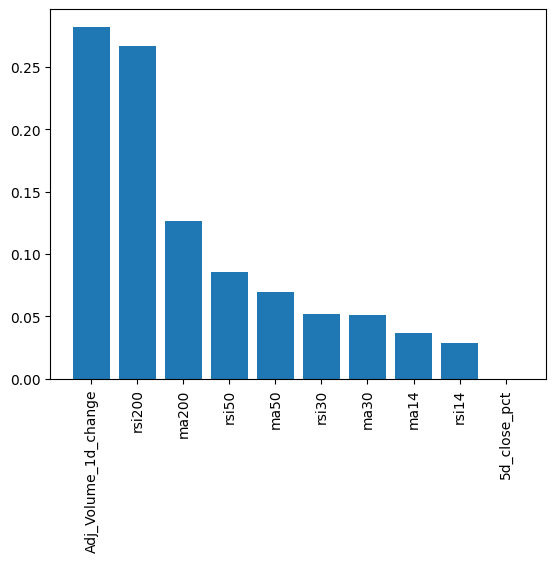

In [19]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features, train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features, test_targets))

0.7007318567579318
0.35379734541408825


['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4']


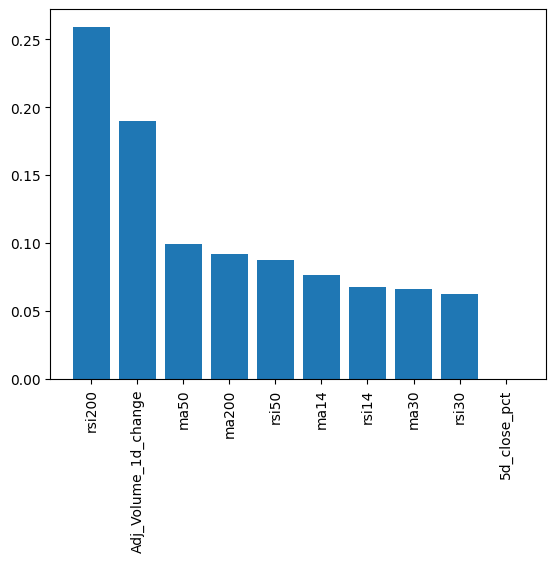

In [21]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
# Ensure x has the correct length
x = range(len(feature_importances))

# Create tick labels
labels = np.array(feature_names)[sorted_index]

print(feature_names)

# Plot the bar chart
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick labels to be the feature names
plt.xticks(rotation=90)
plt.show()


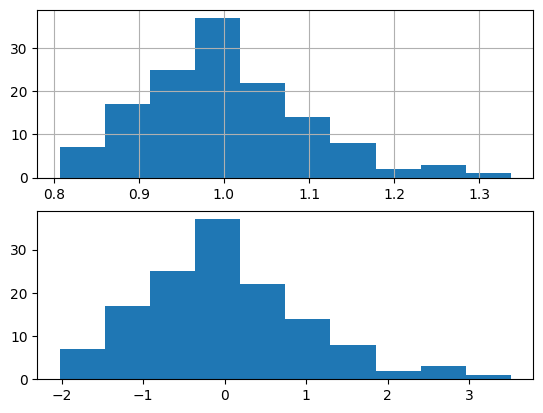

In [22]:
from sklearn.preprocessing import scale

# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.7567724174949075
0.17474007926200186

n_neighbors = 3
train, test scores
0.6442865905513002
0.22889944109901827

n_neighbors = 4
train, test scores
0.5603587141235371
0.35897399687342724

n_neighbors = 5
train, test scores
0.5375817030806447
0.40556602858929625

n_neighbors = 6
train, test scores
0.5159225523787616
0.44918637402964134

n_neighbors = 7
train, test scores
0.5146902700835496
0.45274511164925013

n_neighbors = 8
train, test scores
0.48396310798520514
0.5127989097276711

n_neighbors = 9
train, test scores
0.4717102324924164
0.5071607276200145

n_neighbors = 10
train, test scores
0.4519193839088056
0.5478376121566029

n_neighbors = 11
train, test scores
0.44715708133987353
0.5555118456849211

n_neighbors = 12
train, test scores
0.45104706555041907
0.5561451189112744



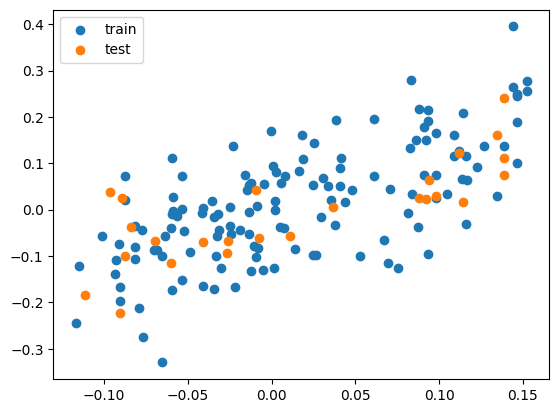

In [24]:
# Create the model with the best-performing n_neighbors of 12
knn = KNeighborsRegressor(n_neighbors=12)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25


c:\Users\Yuchen xin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0275  
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 
Epoch 15/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 
Epoch 16/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

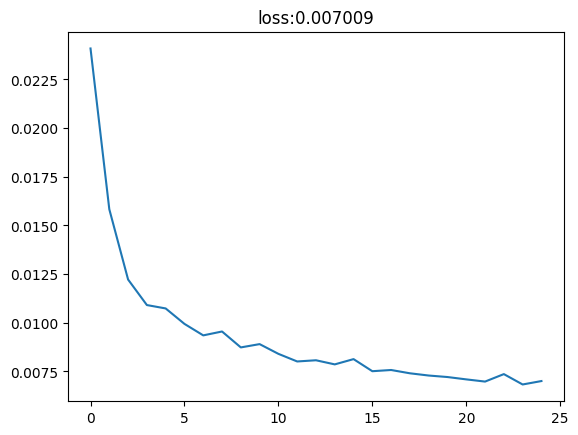

In [26]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0.563864697944068
0.324340851979127


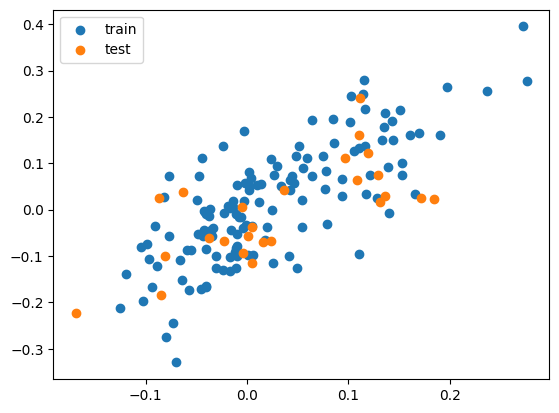

In [27]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend()
plt.show()

In [28]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x0000018579452200>


Epoch 1/25


c:\Users\Yuchen xin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9830  
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6163 
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9059 
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7387 
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2161 
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4303 
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4994 
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2416 
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1973 
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2231 
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2558 
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1638 
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1339 
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2313 
Epoch 15/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2464 
Epoch 16/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

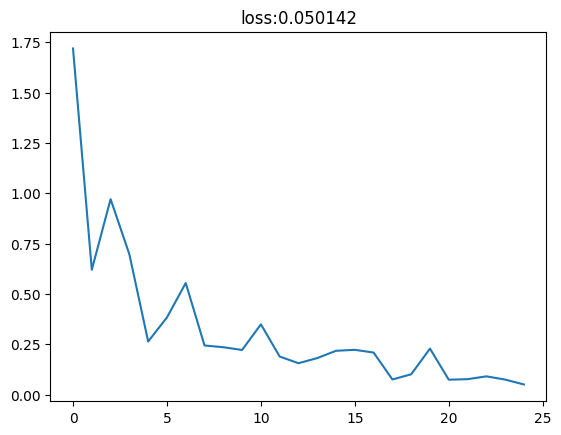

In [29]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
0.21731921165814794
0.1955785976064075


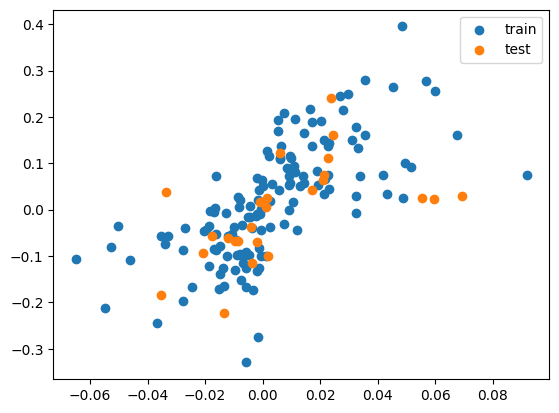

In [30]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25


c:\Users\Yuchen xin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0640  
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0465 
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0468 
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0282 
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 
Epoch 15/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 
Epoch 16/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

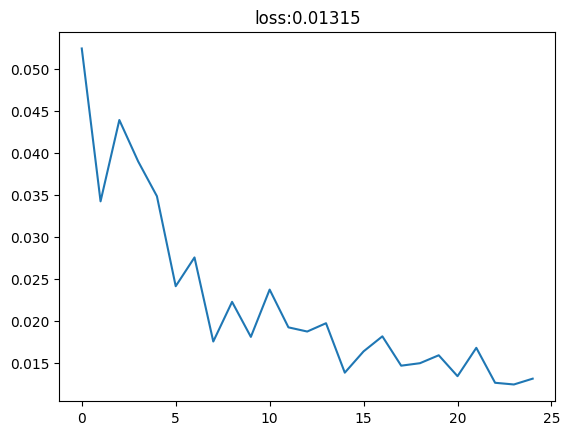

In [31]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [32]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[ 0.08949756 -0.03830585 -0.07284981 -0.01323086  0.12568676]


0.4837399625131197
0.4224240278899747


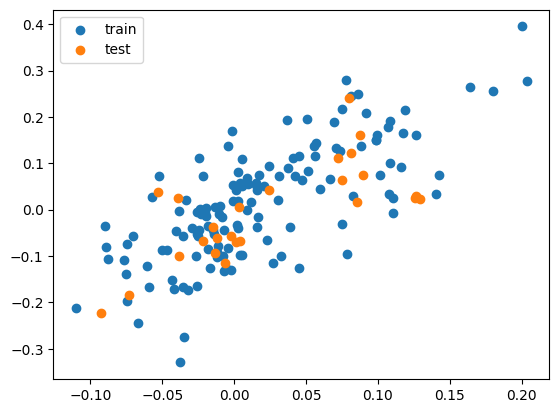

In [33]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()